## 4.9: Intro to Data Visualization with Python - Course Exercise

### Contents List:
 
#### 1. Importing Visualization Libraries

#### 2. Creating Bar Charts

#### 3. Exporting Charts

#### 4. Creating Histograms and Scatterplots

#### 5. Creating Line Charts

#### 6. Sampling Data for the Line Chart

#### 7. Plotting the charts
** **


### 1. Importing Visualization Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#set path

path = r"C:\Users\mehrn\OneDrive\Desktop\CareerFoundry Materials\Tasks\Python\10-01-23 Instacart Basket Analysis"

In [3]:
# Import the latest version of ords_prods

ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Aggregated_ords_prods.pkl'))

### 2. Creating Bar Charts

Text(0.5, 0, 'Days')

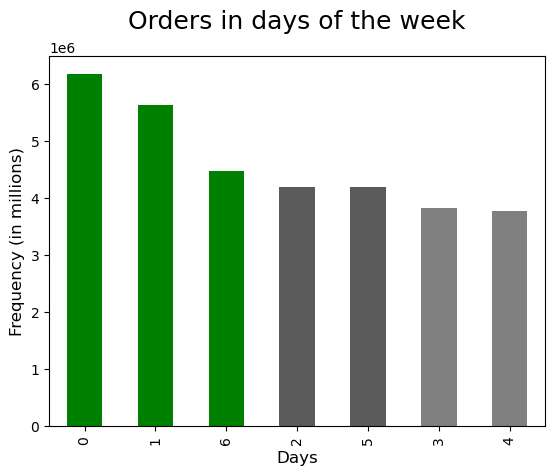

In [4]:
# Creating Bar Chart for 'orders_day_of_week'

bar_days = ords_prods['orders_day_of_week'].value_counts().plot.bar(color = ['green', 'green','green', '#5A5A5A', '#5A5A5A', 'gray', 'gray'])
plt.title('Orders in days of the week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Days',  fontsize = 12)

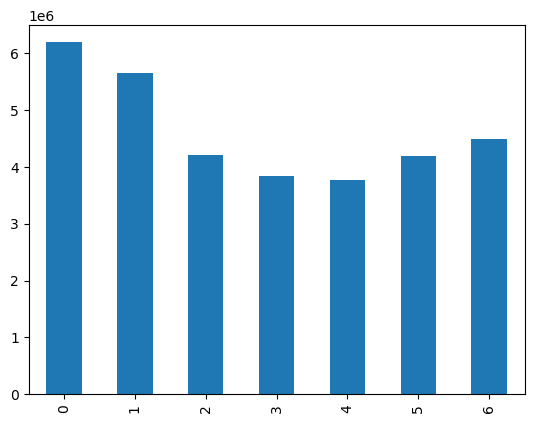

In [5]:
# sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).

bar = ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

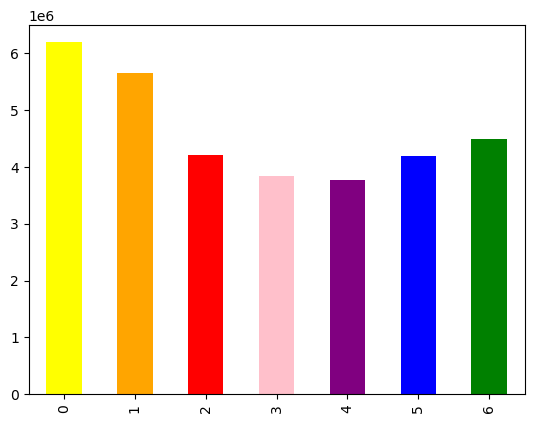

In [6]:
# adding a color argument in your plot.bar() function to change the color of bar chart

bar = ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['yellow', 'orange', 'red', 'pink','purple','blue', 'green'])

### 3. Exporting Charts

In [7]:
# Exporting the barchart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 4. Creating Histograms and Scatterplots


In [8]:
# imputing inf values in 'prices' column


with pd.option_context('mode.use_inf_as_null', True):
   ords_prods =ords_prods.dropna()
#ords_prods = ords_prods[ords_prods.prices.isin(['inf']) == False]
#ords_prods['prices'].replace([np.inf, -np.inf], 99999, inplace = True)
#ords_prods.dropna(subset = ['prices'], inplace = True)

In [9]:
#Export the updated dataset

ords_prods.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','Updated_aggregated_ords_prods.pkl'))

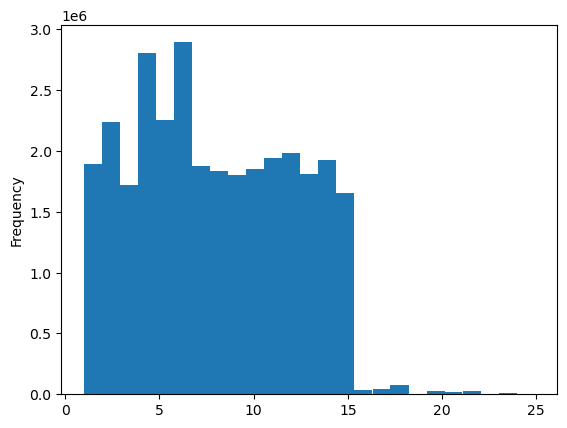

In [10]:
# Creating a histogram of the “prices” column.

hist = ords_prods['prices'].plot.hist(bins = 25)

In [11]:
# Using describe() function which gives a quick list of descriptive statistics for a 'prices' column.

ords_prods['prices'].describe()

count    3.074197e+07
mean              NaN
std      0.000000e+00
min      1.000000e+00
25%      4.398438e+00
50%      7.500000e+00
75%      1.150000e+01
max      2.490625e+01
Name: prices, dtype: float64

In [12]:
ords_prods['prices'].mean()


nan

In [13]:
ords_prods['prices'].max()


24.9

In [14]:
ords_prods['prices'].min()

1.0

In [15]:
# show all values for below cell's command

pd.options.display.max_rows=None

In [16]:
# Checking NaN valuses
ords_prods['prices'].value_counts()

4.000000     737171
14.601562    532475
5.898438     524590
13.601562    470325
11.601562    440510
10.296875    436666
10.000000    425253
6.199219     405456
2.800781     372093
4.898438     357984
5.300781     357297
6.000000     351545
13.703125    345914
8.398438     333899
6.898438     332664
6.398438     331656
6.699219     331106
4.800781     330488
6.800781     329481
1.900391     329006
10.898438    325892
3.599609     321397
1.599609     318521
3.900391     307958
2.000000     299801
5.101562     298046
2.599609     284456
9.398438     282489
13.398438    275713
12.296875    274936
5.500000     274678
7.000000     274458
6.300781     273264
8.203125     270778
2.699219     264748
11.898438    256070
1.400391     252421
4.398438     250445
13.203125    248182
11.296875    247189
7.699219     244510
6.500000     244380
4.500000     239715
3.199219     235761
8.703125     235166
15.000000    234729
11.000000    234053
1.799805     233775
4.699219     231590
5.601562     230109


<AxesSubplot:xlabel='prices', ylabel='prices'>

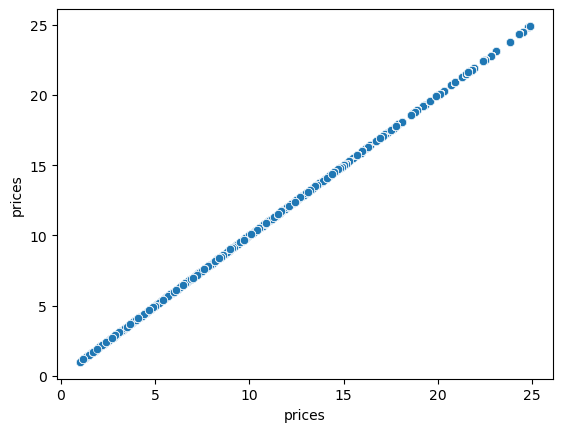

In [17]:
# Plotting the “prices” column against itself. This will reveal whether there are any outliers

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods)

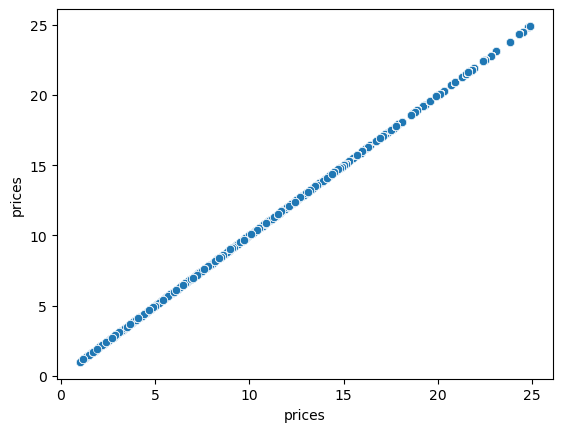

In [18]:
# Asssigning the scatterplot to a variable to export the chart
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods)

In [17]:
# Exporting the scatterplot

scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot.png'))

In [19]:
ords_prods.loc[ords_prods['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,order_behavior,order_frequency_flag


In [20]:
# Assigning outliers to missing values after consulting with clients/senior stakeholder for guidance on how to treat these values

ords_prods.loc[ords_prods['prices'] >100, 'prices'] = np.nan

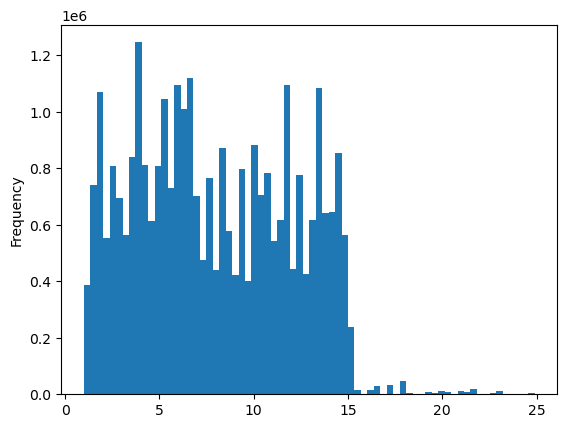

In [21]:
# Increasing the number of bins will allow you to see more variety in your histogram.
# To increase the level of granularity in the histogram, bin = 70, thinner columns:
hist2 = ords_prods['prices'].plot.hist(bins = 70)

In [ ]:
# Exporting histogram

hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### 5. Creating Line Charts

In [22]:
# Creating a subset for the linechart

df = ords_prods[:2000000]

### 6. Sampling Data for the Line Chart

In [23]:
# Sampling Data
#This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers.
#(in this case, seed “4”).

np.random.seed(4)

In [24]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
# Random.rand () will run and produce random num between 0 to 1 for 30741973(length of the df)times


dev = np.random.rand(len(ords_prods)) <= 0.7

In [25]:
# Store 70% of the sample in the dataframe big

big = ords_prods[dev]

In [26]:
# Store 30% of the sample in the dataframe small

small = ords_prods[~dev]

In [27]:
len(ords_prods)

30741973

In [28]:
ords_prods.shape

(30741973, 25)

In [29]:
# Creating df_2, that contains only the “prices” and “orders_day_of_week” columns from your small subse

df_2 = small[['orders_day_of_week','prices']]

### 7. Plotting the charts

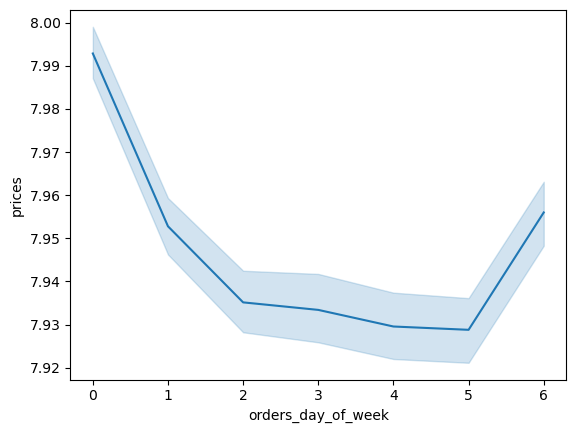

In [30]:
# Drawing a line chart on prices over week

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [31]:
# Exporting the barcharts

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png') , bbox_inches='tight')


In [32]:
bar_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow.png') , bbox_inches='tight')